In [82]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

### Part 01
    
Here is the code I used to explore different combinations and values of $N_{\mathrm{epochs}}, \sigma,   N_{\mathrm{train}} $.
    
The values can be easily changed in the next mirror, and then I added the possibility to save the figures (which I used in the Jupyter Notebook `E11`) in the last mirror of this part.

In [83]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

N_train=1000
N_epochs=30
sigma = 0. # noise standard deviation

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

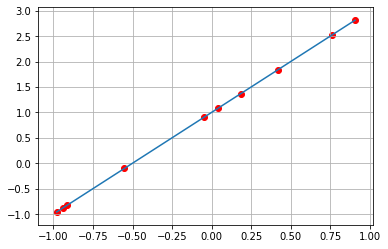

In [84]:
# plot training and target dataset
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

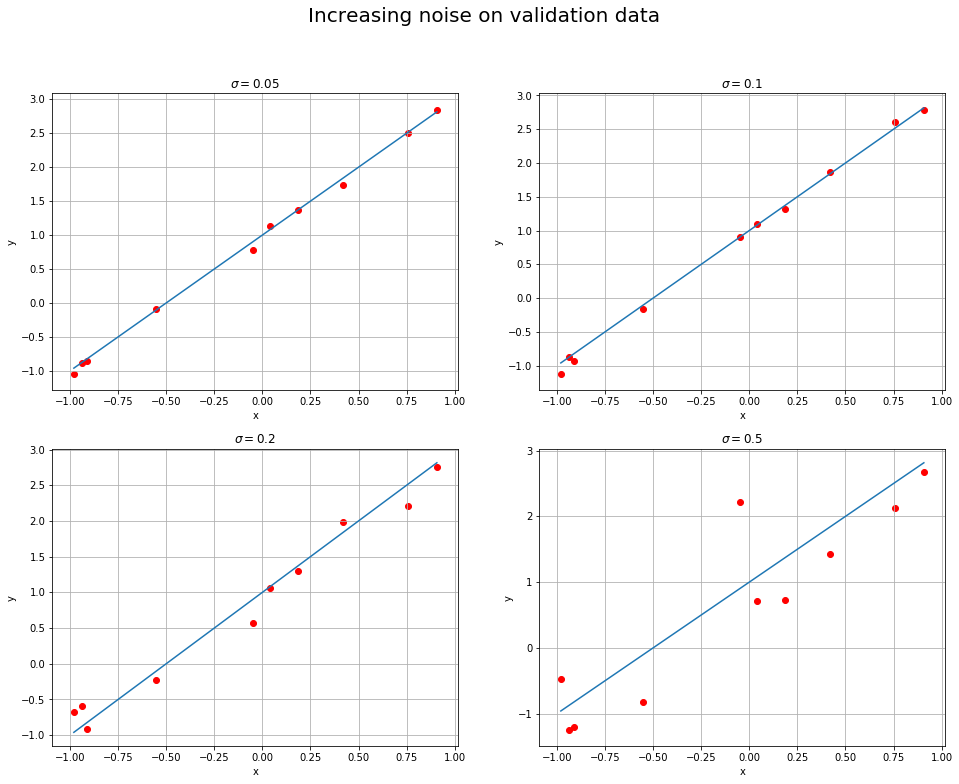

In [85]:
plt.figure(figsize=(16,12))
plt.suptitle('Increasing noise on validation data',fontsize=20)

plt.subplot(221)
plt.title('$\sigma = 0.05$')
y_valid = np.random.normal(m * x_valid + b, 0.05)
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.subplot(222)
plt.title('$\sigma = 0.1$')
y_valid = np.random.normal(m * x_valid + b, 0.1)
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.subplot(223)
plt.title('$\sigma = 0.2$')
y_valid = np.random.normal(m * x_valid + b, 0.2)
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.subplot(224)
plt.title('$\sigma = 0.5$')
y_valid = np.random.normal(m * x_valid + b, 0.5)
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

#plt.savefig('figsigma.jpg')
plt.show()

In [86]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [87]:
# get a summary of our composed model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [88]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
32/32 [==============================] - 0s 3ms/step - loss: 3.5368 - mse: 3.5368 - val_loss: 3.2692 - val_mse: 3.2692
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 2.0895 - mse: 2.0895 - val_loss: 2.2290 - val_mse: 2.2290
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 1.3079 - mse: 1.3079 - val_loss: 1.5645 - val_mse: 1.5645
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 0.8311 - mse: 0.8311 - val_loss: 1.1391 - val_mse: 1.1391
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 0.5337 - mse: 0.5337 - val_loss: 0.8665 - val_mse: 0.8665
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.3443 - mse: 0.3443 - val_loss: 0.6863 - val_mse: 0.6863
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.2240 - mse: 0.2240 - val_loss: 0.5689 - val_mse: 0.5689
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1448 - mse: 0.14

In [89]:
# return weights
model.get_weights()
#first weight is m, the second is b

[array([[1.9951515]], dtype=float32), array([0.99995756], dtype=float32)]

In [90]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 1ms/step - loss: 1.0744e-05 - mse: 1.0744e-05

Test loss: 1.0743779967015143e-05
Test accuracy: 1.0743779967015143e-05


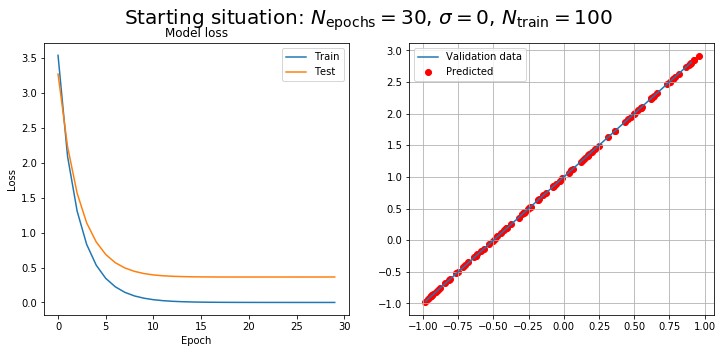

In [91]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(12,5))
plt.suptitle('Starting situation: $N_{\mathrm{epochs}}=30$, $\sigma=0.$, $N_{\mathrm{train}}=100$',fontsize=20)

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(122)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='Predicted')
plt.plot(x_valid, y_target, label='Validation data')
plt.grid(True)
plt.legend()

#plt.savefig("fig6.jpg")
plt.show()

###  Part 02
    
The parameters I changed are (see the Jupyter Notebook `E11` for further informations): 
  
 - the number of layers
 - the number of neurons in each layer
 - the activation function
 - the optimizer
 - the loss function  
    
and one can easily modify them in the first mirror.

In [92]:
#Parameters
N_units=  25   #neuron per hidden layer
act = 'selu' #activation function 
opt = 'Adam' #optimizer
loss = 'logcosh' #loss function

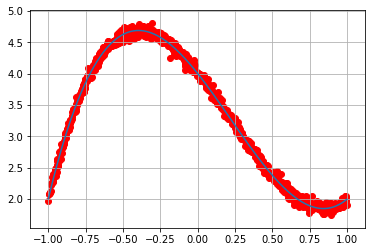

In [93]:
# Number of train and validation points
N_train=10000
N_val = 1000
N_epochs=30
sigma = 0.05 # noise standard deviation

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_val)
x_valid.sort()
y_target = 4. - 3.*x_valid - 2.*x_valid**2 + 3.*x_valid**3 # ideal (target) polinomial

y_train = np.random.normal(4. - 3.*x_train - 2.*x_train**2 + 3.*x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4. - 3.*x_valid - 2.*x_valid**2 + 3.*x_valid**3, sigma)

# plot training and target dataset
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [94]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.add(Dense(N_units, activation=act)) 
model.add(Dense(N_units, activation=act)) 
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer= opt, loss=loss, metrics=['mse'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_22 (Dense)             (None, 25)                50        
_________________________________________________________________
dense_23 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 26        
Total params: 728
Trainable params: 728
Non-trainable params: 0
_________________________________________________________________


In [95]:
# fit the model using training dataset
# over N_epochs epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
313/313 [==============================] - 0s 1ms/step - loss: 0.4824 - mse: 1.6857 - val_loss: 0.1556 - val_mse: 0.4001
Epoch 2/30
313/313 [==============================] - 0s 1ms/step - loss: 0.0883 - mse: 0.2147 - val_loss: 0.0315 - val_mse: 0.0674
Epoch 3/30
313/313 [==============================] - 0s 1ms/step - loss: 0.0195 - mse: 0.0408 - val_loss: 0.0112 - val_mse: 0.0226
Epoch 4/30
313/313 [==============================] - 0s 1ms/step - loss: 0.0096 - mse: 0.0194 - val_loss: 0.0076 - val_mse: 0.0152
Epoch 5/30
313/313 [==============================] - 0s 1ms/step - loss: 0.0068 - mse: 0.0137 - val_loss: 0.0059 - val_mse: 0.0119
Epoch 6/30
313/313 [==============================] - 0s 1ms/step - loss: 0.0052 - mse: 0.0105 - val_loss: 0.0043 - val_mse: 0.0086
Epoch 7/30
313/313 [==============================] - 0s 1ms/step - loss: 0.0043 - mse: 0.0087 - val_loss: 0.0039 - val_mse: 0.0078
Epoch 8/30
313/313 [==============================] - 0s 1ms/step - loss: 0.

In [96]:
# return weights
#model.get_weights()

In [97]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 1ms/step - loss: 2.6265e-04 - mse: 5.2589e-04

Test loss: 0.0002626458299346268
Test accuracy: 0.0005258941673673689


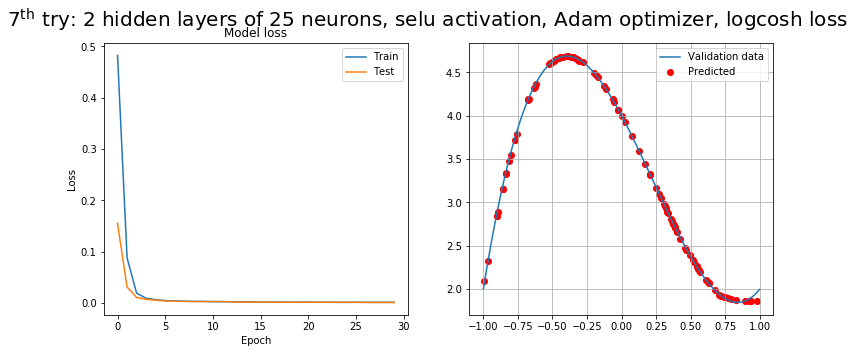

In [98]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(12,5))
plt.suptitle('$7^\mathrm{th}$ try: 2 hidden layers of 25 neurons, selu activation, Adam optimizer, logcosh loss', fontsize=20)

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(122)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='Predicted')
plt.plot(x_valid, y_target, label='Validation data')
plt.grid(True)
plt.legend()

#plt.savefig("Images/figt7.jpg")
plt.show()

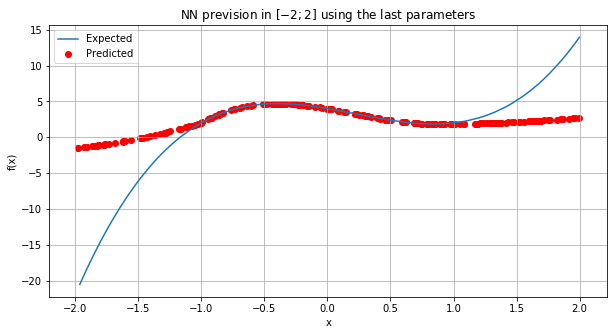

In [99]:
#Data outside of the training interval

plt.figure(figsize=(10,5))
plt.title('NN prevision in $[-2; 2]$ using the last parameters')

# Plot the polinomial in [-2, 2]
x_valid = np.random.uniform(-2, 2, 200)
x_valid.sort()
y_target = 4. - 3.*x_valid - 2.*x_valid**2 + 3.*x_valid**3

plt.plot(x_valid, y_target, label='Expected')

# Plot the prevision
x_predicted = np.random.uniform(-2, 2, 200)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='Predicted')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

#plt.savefig('Images/out1.jpg')

plt.show()

###  Part 03

In [100]:
# Function (takes a vector gives a scalar)
def sin2d(x):
    return np.sin( x[:,0]**2 + x[:,1]**2 )

In [101]:
n_train = 10000 #number of training data
n_valid = 1000  #number of validation data
sigma = 0.05

x_train = np.zeros((n_train, 2))    # (x,y) matrix
z_train = np.zeros((n_train, 1))    # z vector

x_valid = np.zeros((n_valid, 2))
z_valid = np.zeros((n_valid, 1))

x_train[:,0] = np.random.uniform(-3./2., 3./2., n_train)
x_train[:,1] = np.random.uniform(-3./2., 3./2., n_train)

x_valid[:,0] = np.random.uniform(-3./2., 3./2., n_valid)
x_valid[:,1] = np.random.uniform(-3./2., 3./2., n_valid)

z_target= sin2d(x_valid)

z_train = np.random.normal(sin2d(x_train), sigma)
z_valid = np.random.normal(sin2d(x_valid), sigma)

In [102]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(2, input_shape=(2,)))
model.add(Dense(40, Activation('sigmoid')))
model.add(Dense(50, Activation('elu')))
model.add(Dense(20, Activation('elu')))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='Adam', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_26 (Dense)             (None, 40)                120       
_________________________________________________________________
dense_27 (Dense)             (None, 50)                2050      
_________________________________________________________________
dense_28 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 21        
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [103]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=z_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, z_valid))

Epoch 1/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1801 - mse: 0.1801 - val_loss: 0.1728 - val_mse: 0.1728
Epoch 2/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1587 - mse: 0.1587 - val_loss: 0.1714 - val_mse: 0.1714
Epoch 3/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1577 - mse: 0.1577 - val_loss: 0.1808 - val_mse: 0.1808
Epoch 4/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1574 - mse: 0.1574 - val_loss: 0.1691 - val_mse: 0.1691
Epoch 5/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1565 - mse: 0.1565 - val_loss: 0.1690 - val_mse: 0.1690
Epoch 6/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1556 - mse: 0.1556 - val_loss: 0.1684 - val_mse: 0.1684
Epoch 7/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1548 - mse: 0.1548 - val_loss: 0.1683 - val_mse: 0.1683
Epoch 8/50
313/313 [==============================] - 0s 1ms/step - loss: 0.

In [104]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, z_valid, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 981us/step - loss: 0.0038 - mse: 0.0038

Test loss: 0.003777880221605301
Test accuracy: 0.003777880221605301


In [105]:
n_predicted = 1000
x_predicted = np.zeros((n_predicted, 2))    #matrice (x,y)
z_predicted = np.zeros((n_predicted))
x_predicted[:,0] = np.random.uniform(-2., 2., n_predicted)
x_predicted[:,1] = np.random.uniform(-2., 2., n_predicted)
z_predicted= model.predict(x_predicted)
X, Y = np.meshgrid(np.arange(-2.,2.,0.004), np.arange(-2.,2.,0.004))

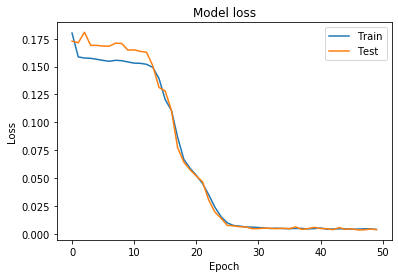

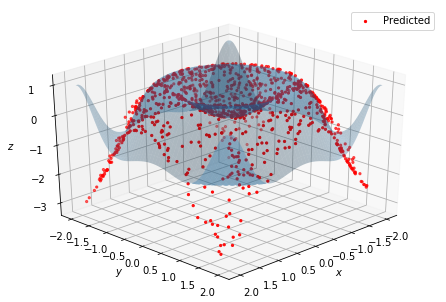

In [109]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.savefig("Images/plot.2D_1.jpg")

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_predicted[:,0], x_predicted[:,1], z_predicted, c='red', marker='.', label = 'Predicted')
ax.plot_surface(X, Y, np.sin(X**2 + Y**2), alpha = 0.3)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(30, 45)

plt.legend()
plt.savefig("Images/plot.2D_2.jpg")
plt.show()